In [0]:
import pandas as pd
import numpy as np

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = "https://drive.google.com/open?id=1ShmxPB3iWw0vvigPFzuvp4ugd0CGgPbB"

In [5]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ShmxPB3iWw0vvigPFzuvp4ugd0CGgPbB


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
train = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
train.drop(train.columns[0], axis=1, inplace=True)

In [0]:
train = train.to_numpy()

In [0]:
X_train = train[:,:-1]
X_label = train[:,-1]

In [0]:
link = "https://drive.google.com/open?id=1uBlDsbtU_6ebQfjzi6lh4IRLK6XArBbH"

In [11]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1uBlDsbtU_6ebQfjzi6lh4IRLK6XArBbH


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
test = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
test.drop(test.columns[0], axis=1, inplace=True)

In [0]:
test = test.to_numpy()

In [0]:
X_test = test[0:500000,:-1]
X_test_label = test[0:500000,-1]

In [0]:
Val_test = test[500000:,:-1]
Val_label = test[500000:,-1]

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, X_label)
model.score(X_test, X_test_label)

0.524392

In [35]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, X_label)
model.score(X_test, X_test_label)

0.542764

In [0]:
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
# model.fit(X_train, X_label)
# model.score(X_test, X_test_label)

In [0]:
accuracy = []

In [65]:
from sklearn.cluster import KMeans
for i in range(300, 2000, 50):
  kmeans = KMeans(n_clusters = 2, max_iter = i)
  kmeans.fit(X_train)
  labels = kmeans.predict(X_train)
  acuu = 1-abs(labels-X_label).sum()/len(X_train)
  print("iterations->", i, "Accuracy->", acuu)
  accuracy.append((i, acuu))

iterations-> 300 Accuracy-> 0.5086660000000001
iterations-> 350 Accuracy-> 0.49133400000000005
iterations-> 400 Accuracy-> 0.49133400000000005
iterations-> 450 Accuracy-> 0.49133400000000005
iterations-> 500 Accuracy-> 0.5086660000000001
iterations-> 550 Accuracy-> 0.5086660000000001
iterations-> 600 Accuracy-> 0.49133400000000005
iterations-> 650 Accuracy-> 0.5086660000000001
iterations-> 700 Accuracy-> 0.5086660000000001
iterations-> 750 Accuracy-> 0.5086660000000001
iterations-> 800 Accuracy-> 0.5086660000000001
iterations-> 850 Accuracy-> 0.5086660000000001
iterations-> 900 Accuracy-> 0.5086660000000001
iterations-> 950 Accuracy-> 0.49133400000000005
iterations-> 1000 Accuracy-> 0.49133400000000005
iterations-> 1050 Accuracy-> 0.5086660000000001
iterations-> 1100 Accuracy-> 0.5086660000000001
iterations-> 1150 Accuracy-> 0.5086660000000001
iterations-> 1200 Accuracy-> 0.5086660000000001
iterations-> 1250 Accuracy-> 0.5086660000000001
iterations-> 1300 Accuracy-> 0.5086660000000001


In [0]:
import matplotlib.pyplot as pt

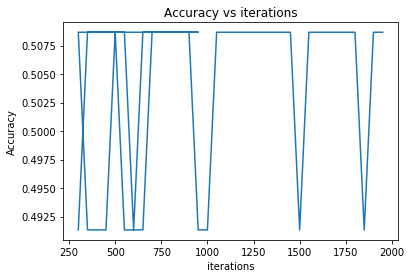

In [67]:
pt.plot(*zip(*accuracy))
pt.title('Accuracy vs iterations')
pt.xlabel('iterations')
pt.ylabel('Accuracy')
pt.show()